# Libraries and functions initialization

In [2]:
library(repr)
options(repr.plot.width=11, repr.plot.height=7, repr.plot.res = 80, repr.plot.quality = 40)
options(jupyter.plot_mimetypes = 'image/png')

setwd("~/yandexDisk/DIPLOMA/CODE/src")
source("simulations.functions.R", echo=FALSE)
source("../../OWL/O_learning_functions.r", echo=FALSE)
debug.file <- ".various.Rdata/Iter.info"
set.seed(0)

Loading SVMW


In [ ]:
curve(Shvechikov.1.fopt, from=0, to=100)
curve(Shvechikov.2.fopt, from=0, to=100)

In [8]:
train <- GetSimulationData(1000, scenario = "shvechikov.1", noise=F)

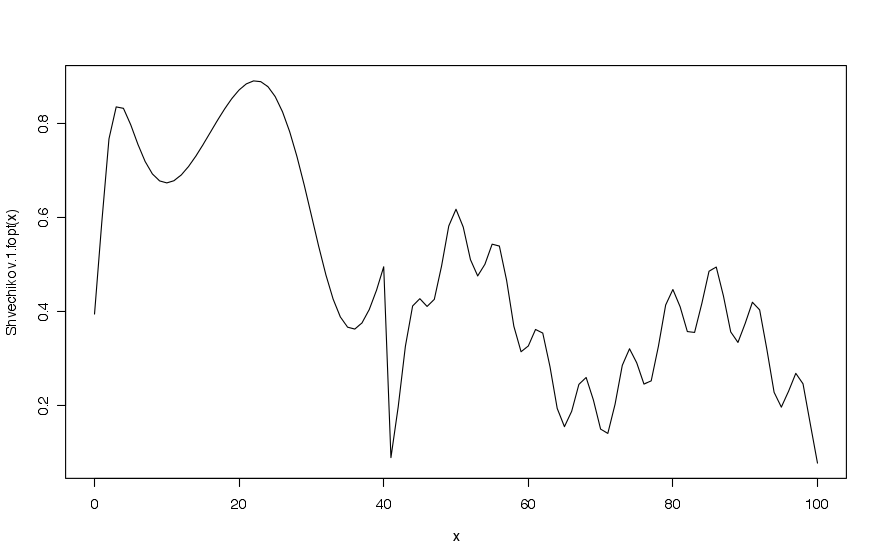

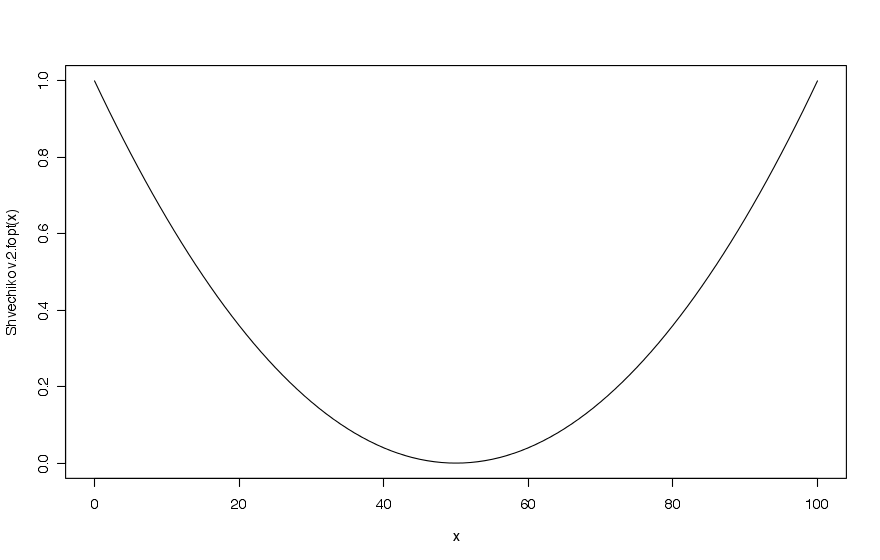

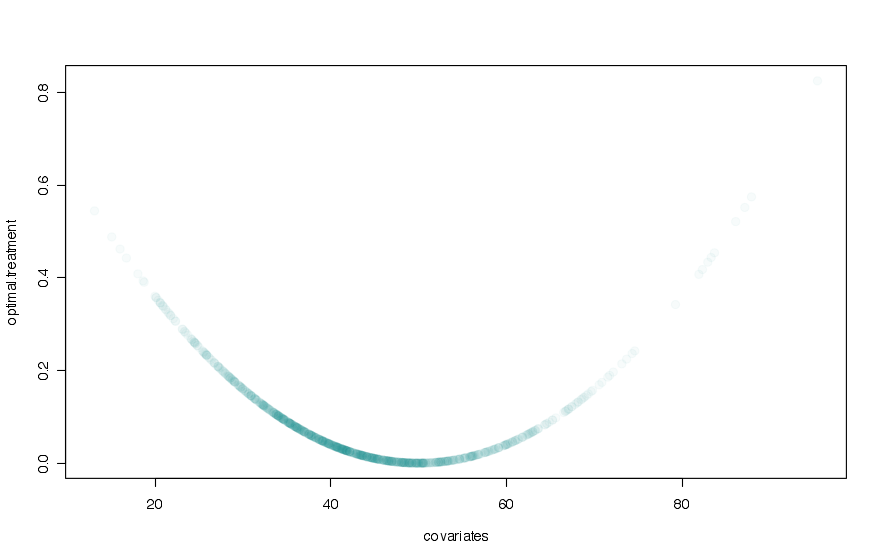

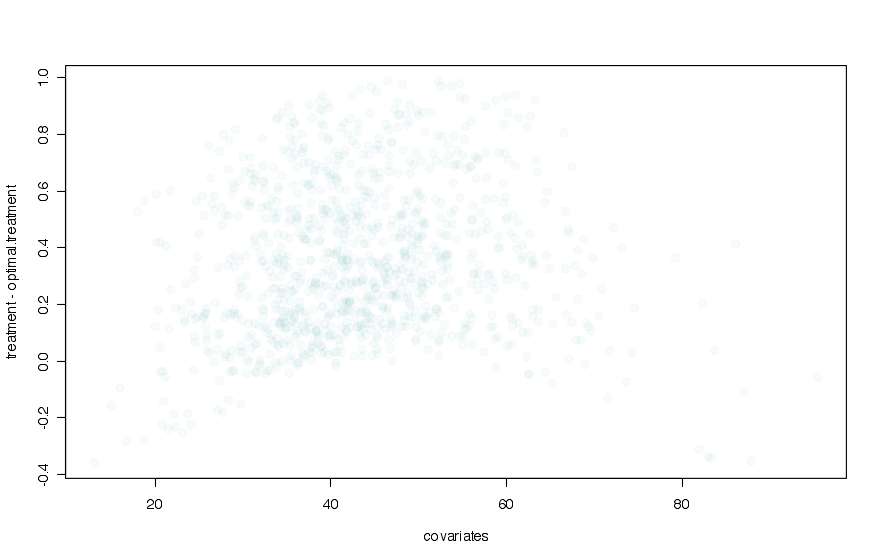

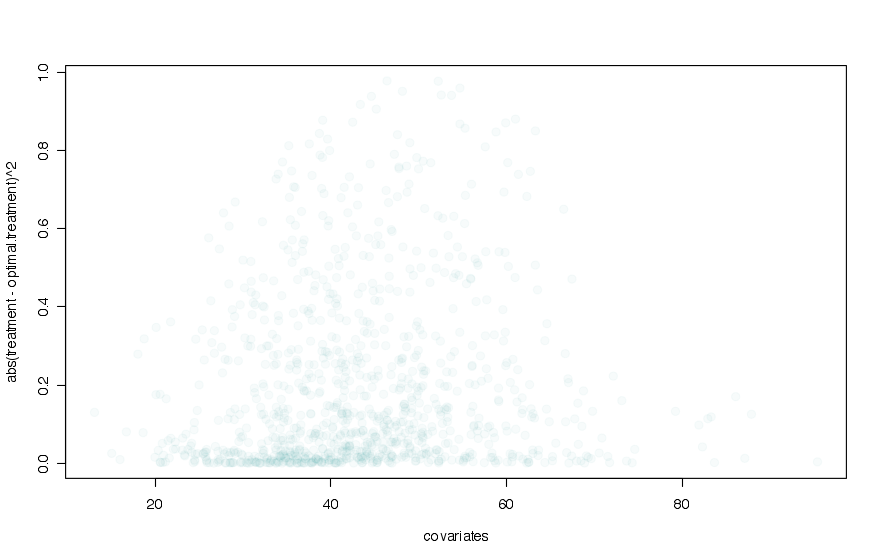

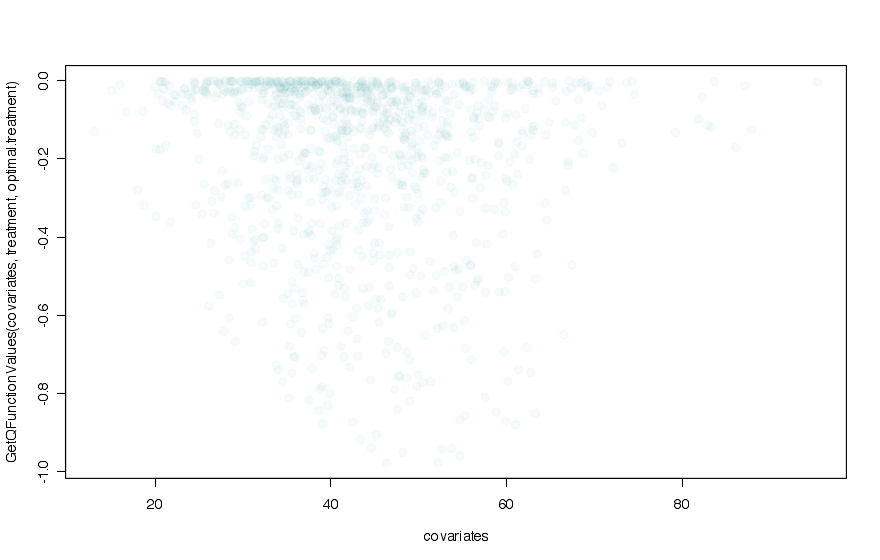

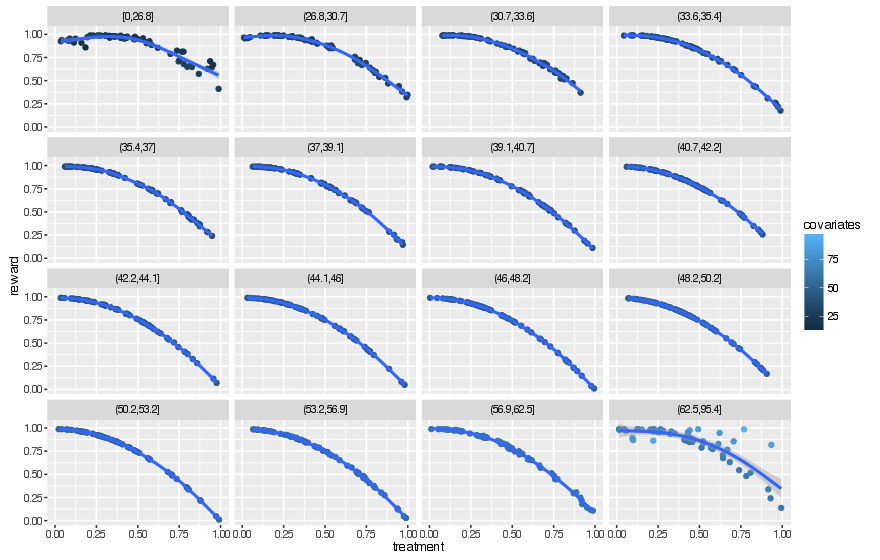

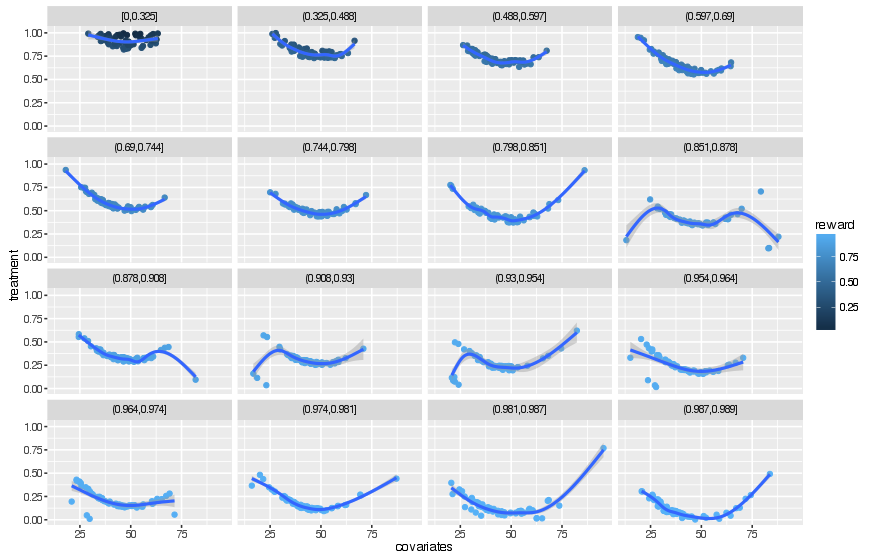

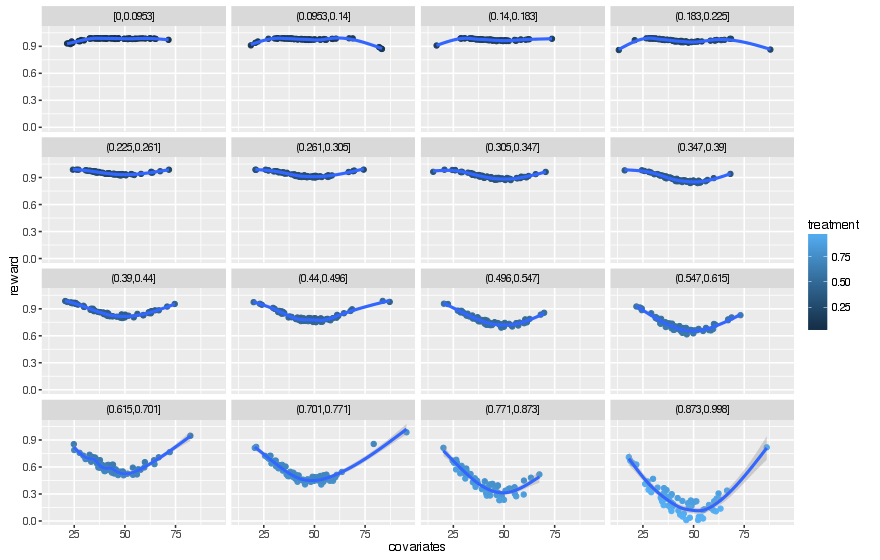

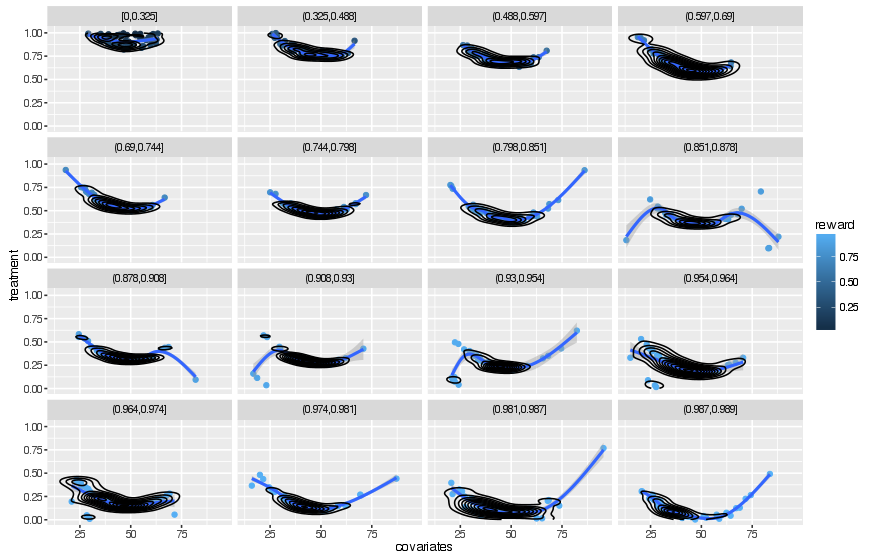

In [9]:
train <- GetSimulationData(10000, scenario = "shvechikov.1", noise=F)

with(train, plot(covariates, optimal.treatment, 
                 pch=19, cex=1.2, col=rgb(0,0.5,0.5, 0.03)))
with(train, plot(covariates, treatment - optimal.treatment, 
                 pch=19, cex=1.2, col=rgb(0,0.5,0.5, .03)))
with(train, plot(covariates, abs(treatment - optimal.treatment)**2, 
                 pch=19, cex=1.2, col=rgb(0,0.5,0.5, 0.03)))

with(train, plot(covariates, GetQFunctionValues(covariates, treatment, optimal.treatment), 
                 pch=19, cex=1.2, col=rgb(0,0.5,0.5, 0.03)))

library(ggplot2)

granularity <- 16
levels <- 1:granularity / granularity
d <- with(train, data.frame(reward=reward, treatment=treatment, covariates=covariates, 
                            treat.bins=cut(treatment, c(0, quantile(treatment, levels)), include.lowest = T), 
                            rew.bins=cut(reward, c(0, quantile(reward, levels)), include.lowest = T), 
                            cov.bins=cut(covariates, c(0, quantile(covariates, levels)), include.lowest = T)))

ggplot(d, aes(treatment, reward, col=covariates)) + geom_point() + geom_smooth() + facet_wrap(~cov.bins)
ggplot(d, aes(covariates, treatment, col=reward)) +  geom_point() + geom_smooth() + facet_wrap(~rew.bins)
ggplot(d, aes(covariates, reward, col=treatment)) + geom_point() + geom_smooth() + facet_wrap(~treat.bins)
ggplot(d, aes(covariates, treatment, col=reward)) +  geom_point() + geom_smooth() + facet_wrap(~rew.bins) + geom_density2d(col="black")